# Glumpy (480Hz, fullscreen, pixel [5,5], 50 iterations)
Frameworks
- qt (keine Ergebnisse bei C pixel reader)
- pyglet (keine Ergebnisse bei C pixel reader)
- glfw (keine Ergebnisse bei C pixel reader)
- sdl/pygame

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [11]:
PATH = "../../data/glumpy/glumpy_291123_55"

In [12]:
files = os.listdir(PATH)
files = [x for x in files if 'csv' in x]
files

['glumpy_glfw_default_False_bitblt_98d0f4f9-c6bf-42bb-b3df-2a749c2ce7d4.csv',
 'glumpy_glfw_default_False_getdbits_b7d44f64-eef6-424a-bde0-2566e5c1c951.csv',
 'glumpy_glfw_default_False_getpixel_f803ff27-bd7c-4123-aca1-e1957f46817c.csv',
 'glumpy_glfw_default_False_windup_python_1cae46f0-d16a-4dec-899c-3a4a01822faa.csv',
 'glumpy_glfw_default_True_bitblt_2166fc54-2f06-4ca5-81a2-c69e323c00de.csv',
 'glumpy_glfw_default_True_getdbits_55aa3530-4cc9-4020-b2a5-ce77f3e6f2b0.csv',
 'glumpy_glfw_default_True_getpixel_2bb4f289-d1be-45f9-87c1-2d214dfae97f.csv',
 'glumpy_glfw_default_True_windup_python_818fbc02-9bdf-4e92-a6f0-49d806c78d54.csv',
 'glumpy_glfw_rects_False_bitblt_f0244aa9-1a32-4576-b617-56403a7c971e.csv',
 'glumpy_glfw_rects_False_getdbits_fc43a713-13ea-408c-a580-62bb078b9086.csv',
 'glumpy_glfw_rects_False_getpixel_1435e23c-4b63-4eeb-a0e5-92c14eca64dd.csv',
 'glumpy_glfw_rects_False_windup_python_e7948ddf-483d-4330-b6be-e6077fd927d5.csv',
 'glumpy_glfw_rects_True_bitblt_b68d8777-7e

In [13]:
dataframes = []
for file in files:
    dataframes.append(pd.read_csv(f"{PATH}/{file}"))
data_raw = pd.concat(dataframes)

In [14]:
# clean because windup not working with opengl based
# df.loc[~((df['col1'] == 'A') & (df['col2'] > 6))] 
data_clean = data_raw.loc[~((data_raw['fw_running'] == True) & (data_raw['fw'] == -1))]
data = data_clean

## End-to-end latencies with and without running framework tester
### Complexity: Default

Almost the same -> no additional latency with framework tester

C:\Users\tina\AppData\Local\Temp\ipykernel_2280\3308236901.py:3: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:black'` for the same effect.

  sns.stripplot(data=data[data['complexity'] == 'default'], x='program', y='ete', hue='fw_running', dodge=True, color='black')


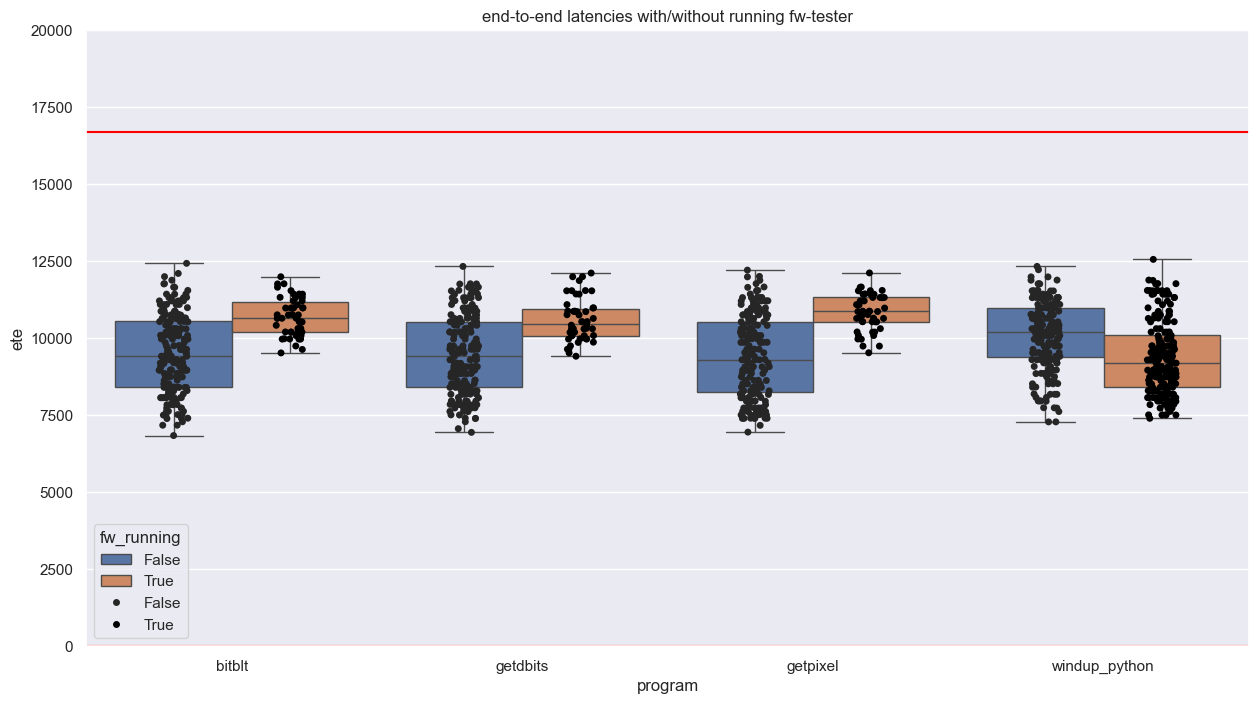

In [15]:
sns.set(rc={'figure.figsize':(15, 8)})
sns.boxplot(data=data[data['complexity'] == 'default'], x='program', y='ete', hue='fw_running').set_title('end-to-end latencies with/without running fw-tester')
sns.stripplot(data=data[data['complexity'] == 'default'], x='program', y='ete', hue='fw_running', dodge=True, color='black')
ax = plt.gca()
ax.set_ylim(0, 20000)
for i in range(0, 20):
    plt.axhline(i*16.7*1000, color='red')

### Complexity: Rects

Also, no additional latency (even faster with running framework tester)

C:\Users\tina\AppData\Local\Temp\ipykernel_2280\2271949248.py:2: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:black'` for the same effect.

  sns.stripplot(data=data[data['complexity'] == 'rects'], x='program', y='ete', hue='fw_running', dodge=True, color='black')


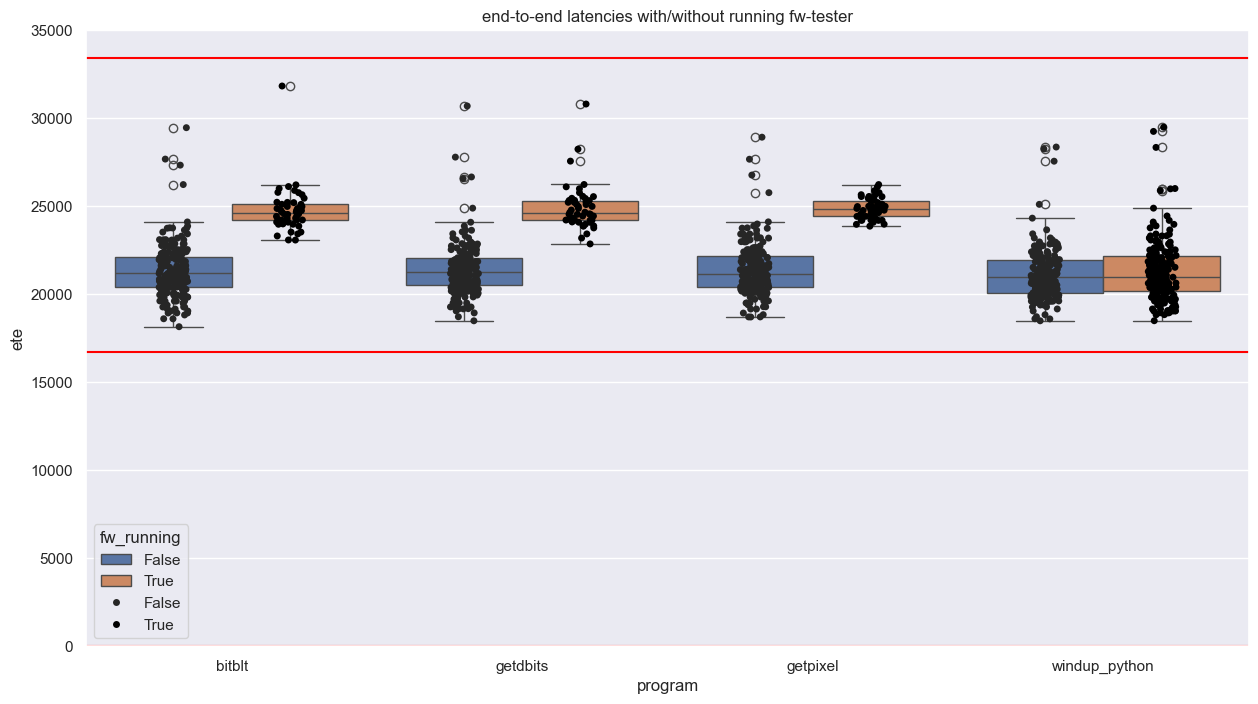

In [16]:
sns.boxplot(data=data[data['complexity'] == 'rects'], x='program', y='ete', hue='fw_running').set_title('end-to-end latencies with/without running fw-tester')
sns.stripplot(data=data[data['complexity'] == 'rects'], x='program', y='ete', hue='fw_running', dodge=True, color='black')
ax = plt.gca()
ax.set_ylim(0, 35000)
for i in range(0, 20):
    plt.axhline(i*16.7*1000, color='red')

## Framework latency by framework
### Complexity: Default

no results for pyqt5 and wxpython because of border

C:\Users\tina\AppData\Local\Temp\ipykernel_2280\1753498729.py:2: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:black'` for the same effect.

  sns.stripplot(data=data[((data['complexity'] == 'default') & (data['fw_running'] == True))], x='framework', y='fw', hue='program', dodge=True, color='black')


(-1000.0, 25000.0)

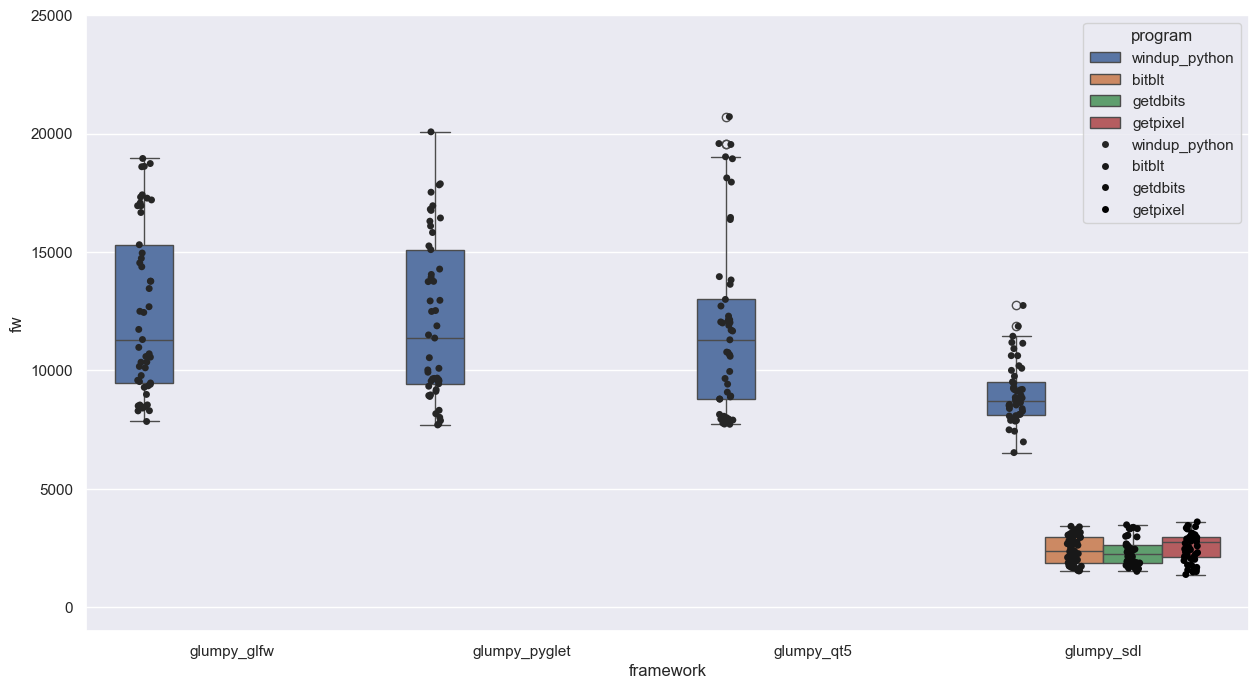

In [17]:
sns.boxplot(data=data[((data['complexity'] == 'default') & (data['fw_running'] == True))], x='framework', y='fw', hue='program', dodge=True).set_title('')
sns.stripplot(data=data[((data['complexity'] == 'default') & (data['fw_running'] == True))], x='framework', y='fw', hue='program', dodge=True, color='black')
ax = plt.gca()
ax.set_ylim(-1000, 25000)

### Complexity: Rects

C:\Users\tina\AppData\Local\Temp\ipykernel_2280\1554111015.py:2: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:black'` for the same effect.

  sns.stripplot(data=data[((data['complexity'] == 'rects') & (data['fw_running'] == True))], x='framework', y='fw', hue='program', dodge=True, color='black')


(-1000.0, 30000.0)

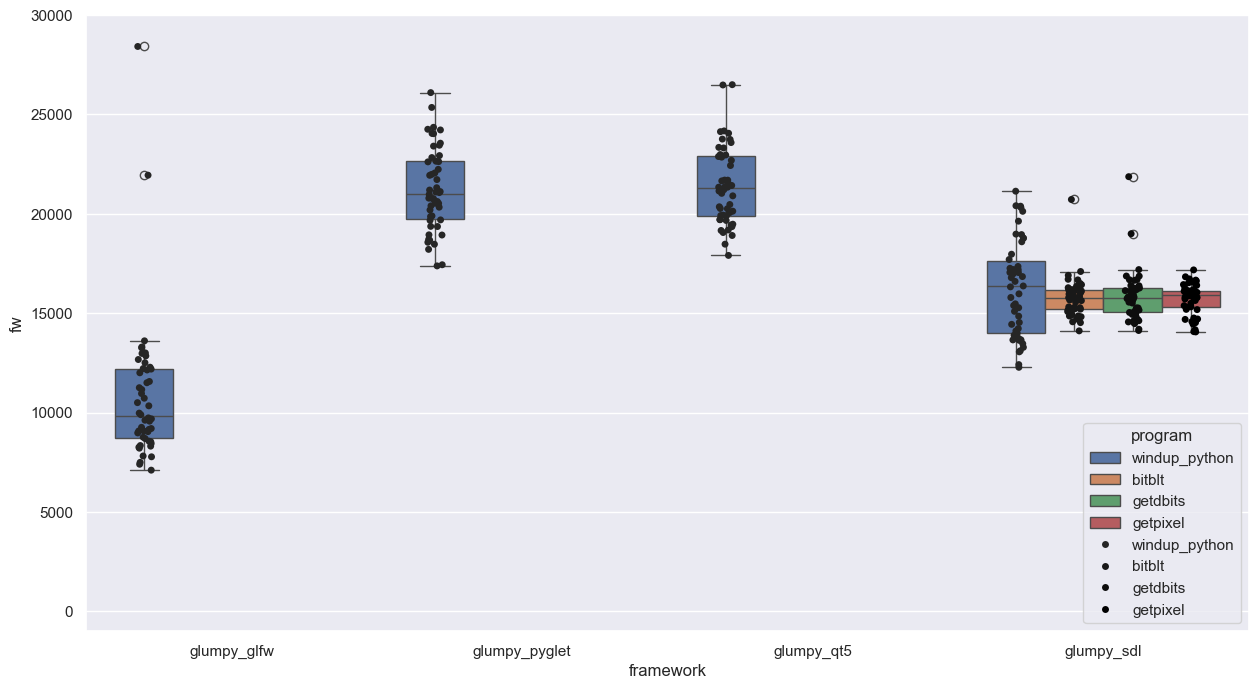

In [18]:
sns.boxplot(data=data[((data['complexity'] == 'rects') & (data['fw_running'] == True))], x='framework', y='fw', hue='program', dodge=True).set_title('')
sns.stripplot(data=data[((data['complexity'] == 'rects') & (data['fw_running'] == True))], x='framework', y='fw', hue='program', dodge=True, color='black')
ax = plt.gca()
ax.set_ylim(-1000, 30000)

### Framework latency by complexity

C:\Users\tina\AppData\Local\Temp\ipykernel_2280\252265620.py:2: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:black'` for the same effect.

  sns.stripplot(data=data[data['fw_running'] == True], x='complexity', y='fw', hue='program_fwrunning', dodge=True, color='black')


<Axes: xlabel='complexity', ylabel='fw'>

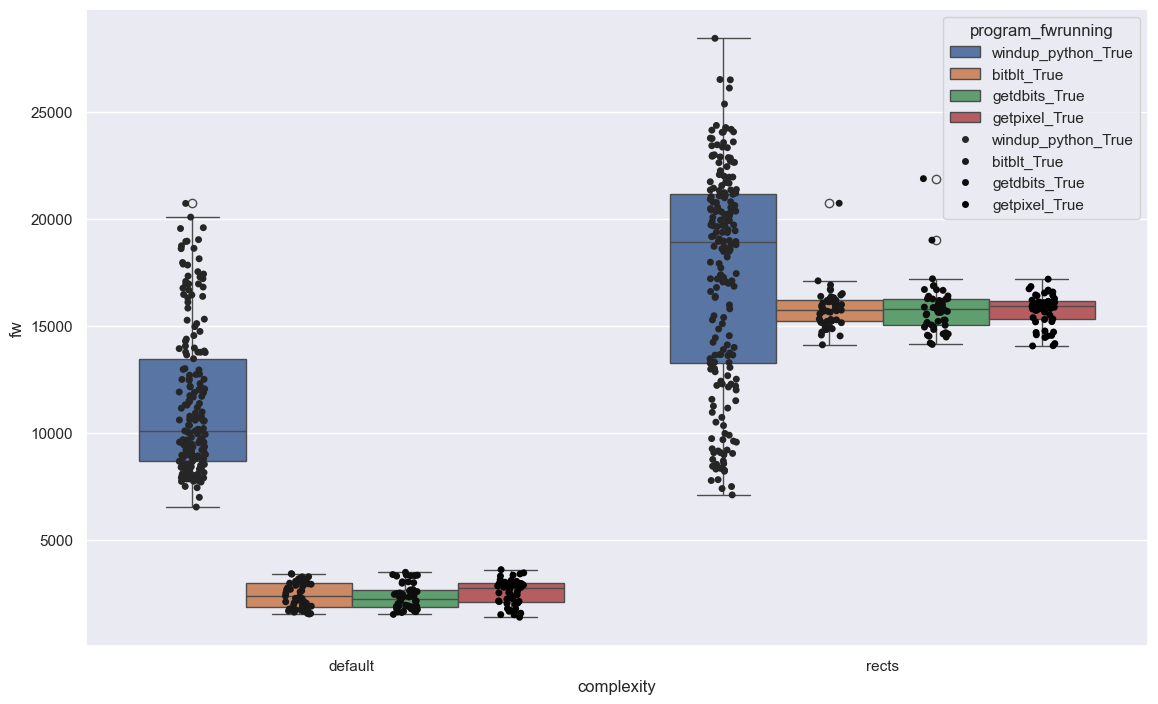

In [25]:
sns.boxplot(data=data[data['fw_running'] == True], x='complexity', y='fw', hue='program_fwrunning', dodge=True).set_title('')
sns.stripplot(data=data[data['fw_running'] == True], x='complexity', y='fw', hue='program_fwrunning', dodge=True, color='black')

### Framework latency by framework

C:\Users\tina\AppData\Local\Temp\ipykernel_2280\2248004208.py:2: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:#000000'` for the same effect.

  sns.stripplot(data=data[data['fw_running'] == True], x='framework', y='fw', hue='framework_complexity', dodge=True, color=(0,0,0))


<Axes: xlabel='framework', ylabel='fw'>

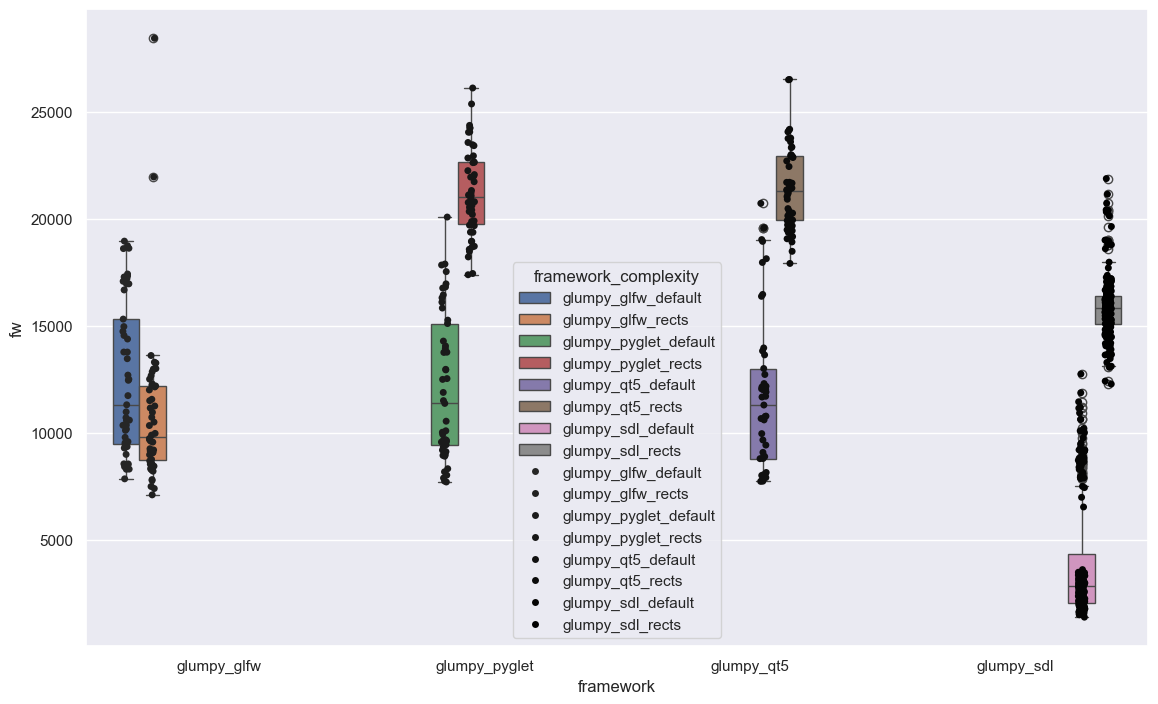

: 

In [26]:
sns.boxplot(data=data[data['fw_running'] == True], x='framework', y='fw', hue='framework_complexity', dodge=True).set_title('')
sns.stripplot(data=data[data['fw_running'] == True], x='framework', y='fw', hue='framework_complexity', dodge=True, color=(0,0,0))

C:\Users\tina\AppData\Local\Temp\ipykernel_2280\1861968181.py:2: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:black'` for the same effect.

  sns.stripplot(data=data[data['fw_running'] == True], x='framework', y='fw', hue='program', dodge=True, color='black')


<Axes: xlabel='framework', ylabel='fw'>

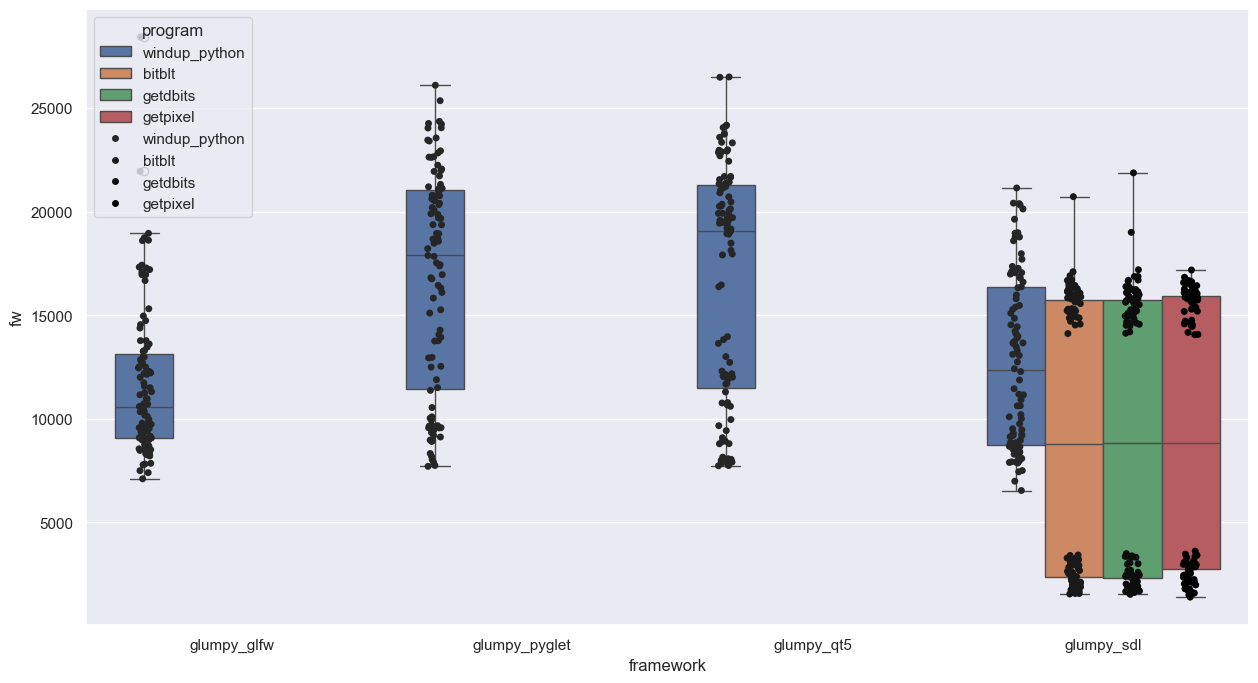

In [21]:
sns.boxplot(data=data[data['fw_running'] == True], x='framework', y='fw', hue='program', dodge=True).set_title('')
sns.stripplot(data=data[data['fw_running'] == True], x='framework', y='fw', hue='program', dodge=True, color='black')

## Difference (ete and fw) by program
### Complexity: Rects

C:\Users\tina\AppData\Local\Temp\ipykernel_2280\902970262.py:2: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:black'` for the same effect.

  sns.stripplot(data=data[((data['fw_running'] == True) & (data['complexity'] == 'rects'))], x='framework', y='diff', hue='program', dodge=True, color='black')


<Axes: xlabel='framework', ylabel='diff'>

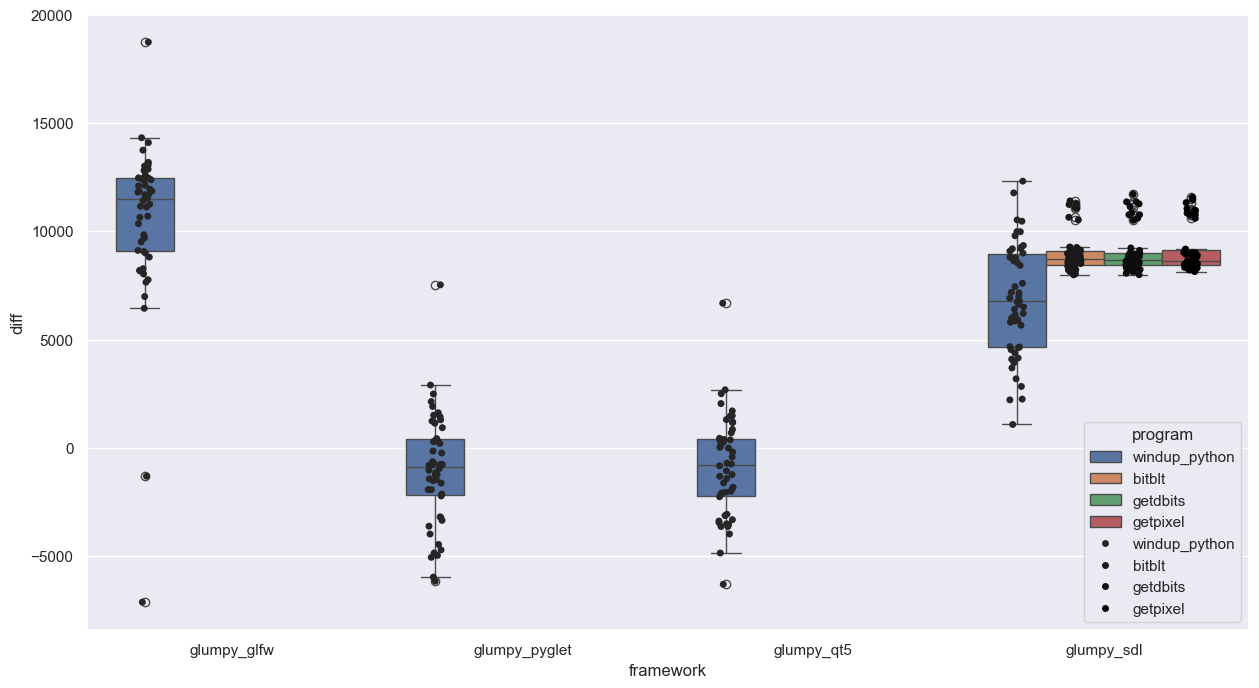

In [22]:
sns.boxplot(data=data[((data['fw_running'] == True) & (data['complexity'] == 'rects'))], x='framework', y='diff', hue='program', dodge=True).set_title('')
sns.stripplot(data=data[((data['fw_running'] == True) & (data['complexity'] == 'rects'))], x='framework', y='diff', hue='program', dodge=True, color='black')


### Complexity: Default

C:\Users\tina\AppData\Local\Temp\ipykernel_2280\3483295662.py:3: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:black'` for the same effect.

  sns.stripplot(data=data[((data['fw_running'] == True) & (data['complexity'] == 'default'))], x='framework', y='diff', hue='program', dodge=True, color='black')


<Axes: xlabel='framework', ylabel='diff'>

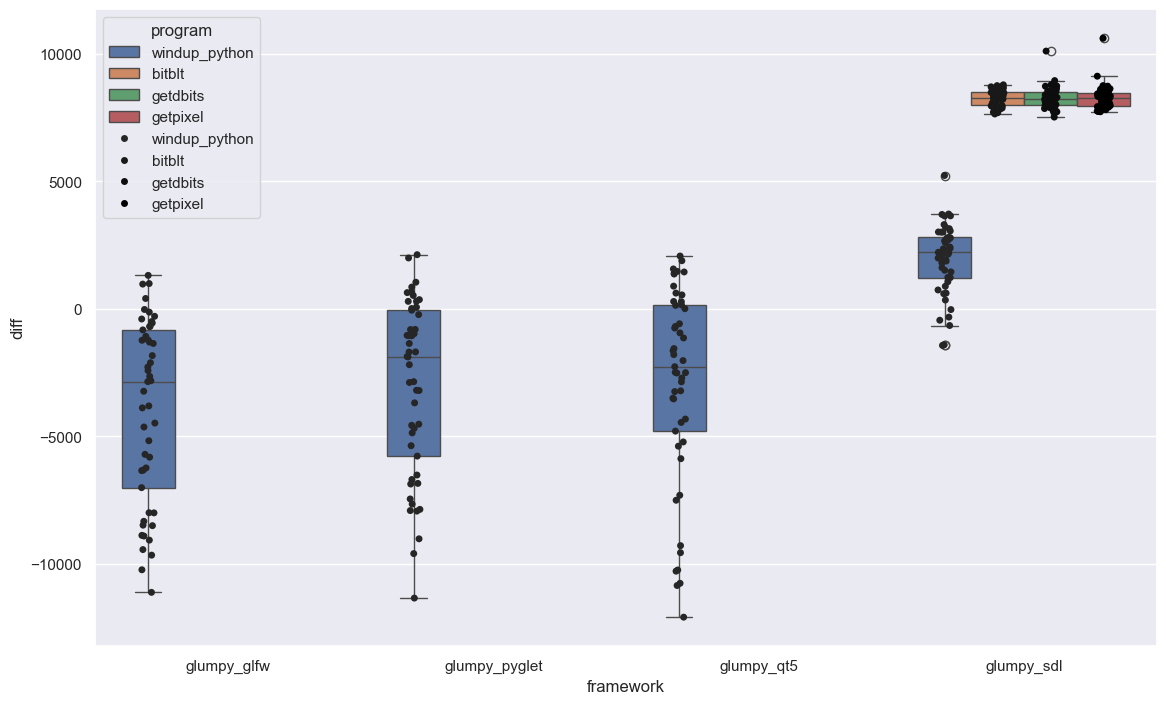

In [23]:
sns.set(rc={'figure.figsize':(13.7,8.27)})
sns.boxplot(data=data[((data['fw_running'] == True) & (data['complexity'] == 'default'))], x='framework', y='diff', hue='program', dodge=True).set_title('')
sns.stripplot(data=data[((data['fw_running'] == True) & (data['complexity'] == 'default'))], x='framework', y='diff', hue='program', dodge=True, color='black')

<Axes: xlabel='framework', ylabel='diff'>

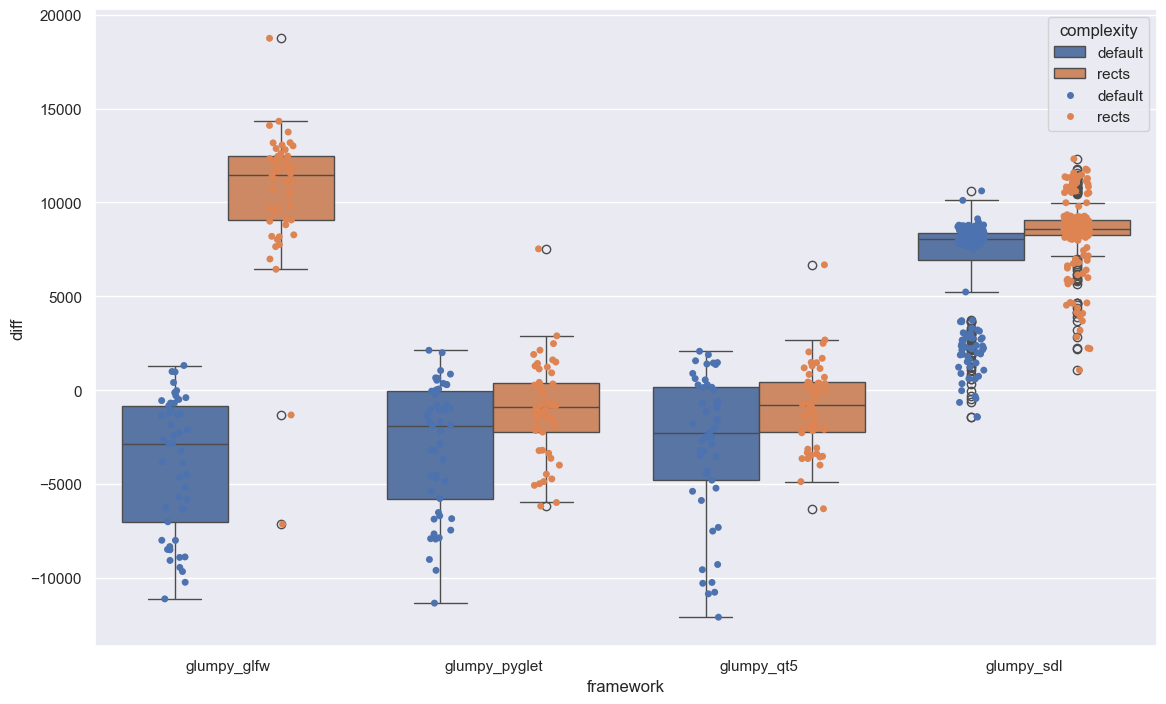

In [24]:
sns.boxplot(data=data[(data['fw_running'] == True)], x='framework', y='diff', hue='complexity', dodge=True).set_title('')
sns.stripplot(data=data[(data['fw_running'] == True)], x='framework', y='diff', hue='complexity', dodge=True)